In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats



In [2]:
df = pd.read_csv("Durgapur.csv")
pd.set_option("display.max_columns", None)
df

,YEAR,MO,DY,WS2M,T2M,RH2M,PRECTOTCORR,WD50M,WS10M_RANGE,PS
0,2011,1,1,2.53,17.58,74.25,0.01,296.38,4.77,100.35
1,2011,1,2,1.98,15.07,58.88,0.00,331.19,2.76,100.62
2,2011,1,3,1.95,13.91,57.38,0.00,338.12,1.88,100.81
3,2011,1,4,2.14,13.65,61.44,0.00,338.44,1.70,100.78
4,2011,1,5,2.05,13.66,55.25,0.00,331.12,2.48,100.66
...,...,...,...,...,...,...,...,...,...,...
3738,2021,3,27,1.02,30.13,24.94,0.00,243.88,1.68,100.14
3739,2021,3,28,0.81,30.05,32.00,0.00,205.38,2.53,99.98
3740,2021,3,29,1.66,30.83,42.88,0.00,244.38,3.36,99.73
3741,2021,3,30,2.27,32.32,32.25,0.00,257.50,5.63,99.30


In [3]:
numerical_feature = [
    feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(
    df[feature].unique()) < 32]
continuous_feature = [
    feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [
    feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))


Numerical Features Count 10
Discrete feature Count 3
Continuous feature Count 7
Categorical feature Count 0


In [4]:
# Handle Missing Values
df.isnull().sum()*100/len(df)



YEAR           0.0
MO             0.0
DY             0.0
WS2M           0.0
T2M            0.0
RH2M           0.0
PRECTOTCORR    0.0
WD50M          0.0
WS10M_RANGE    0.0
PS             0.0
dtype: float64

In [5]:
print(numerical_feature)


['YEAR', 'MO', 'DY', 'WS2M', 'T2M', 'RH2M', 'PRECTOTCORR', 'WD50M', 'WS10M_RANGE', 'PS']


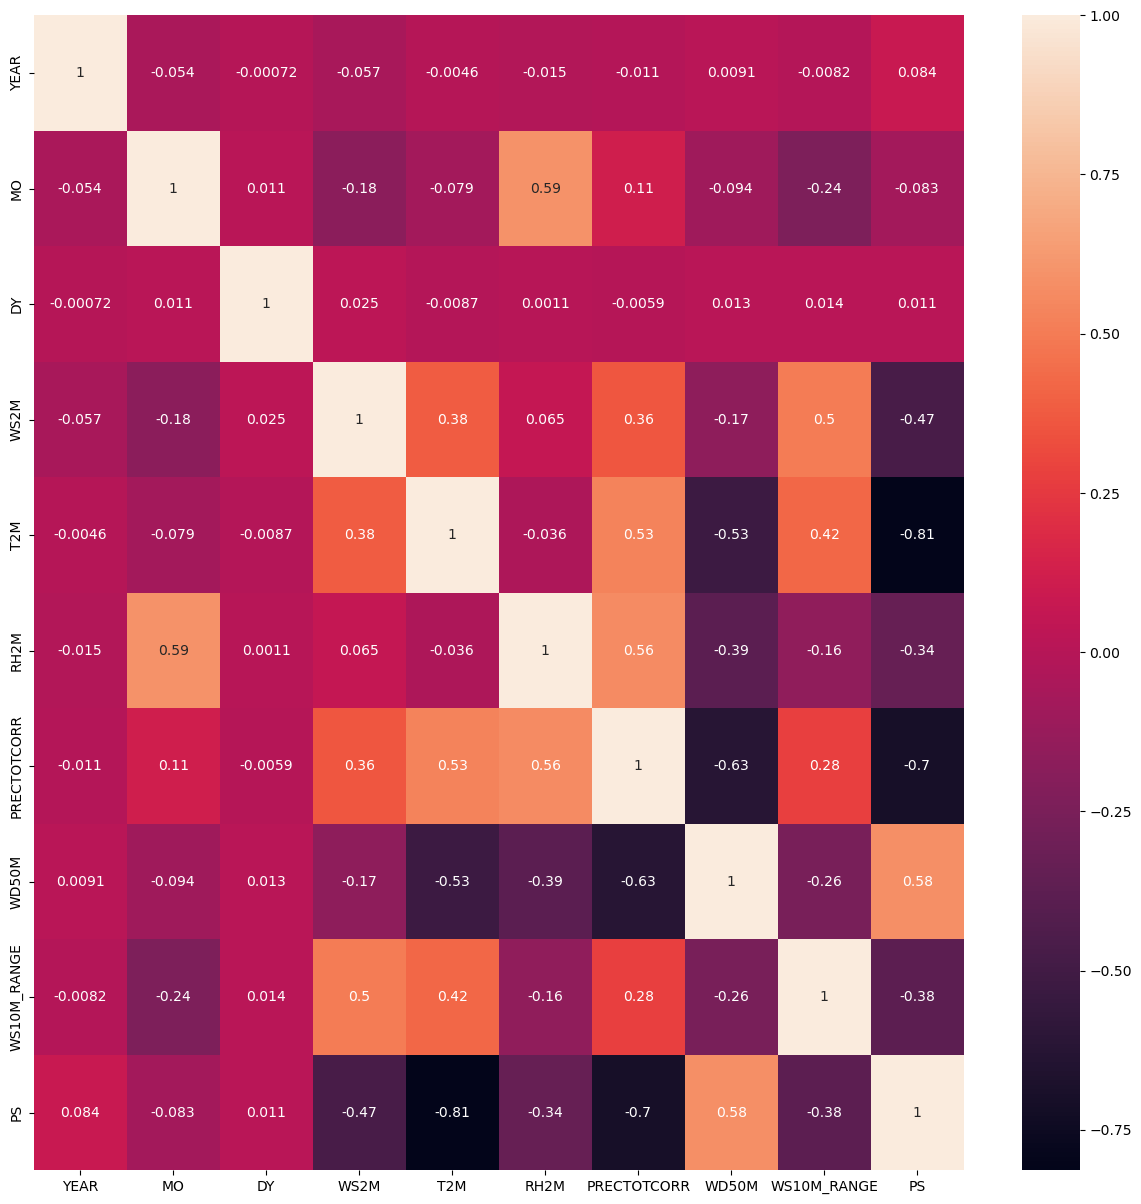

In [6]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [7]:
data=df.copy()

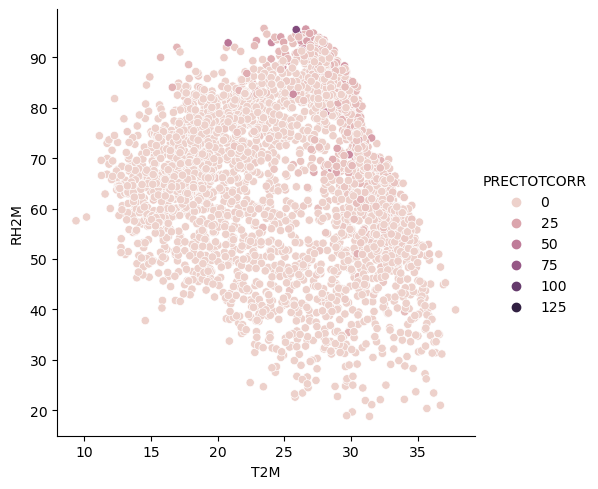

In [8]:
sns.relplot(x='T2M', y='RH2M', hue='PRECTOTCORR', data=data)
#QV :Humedity


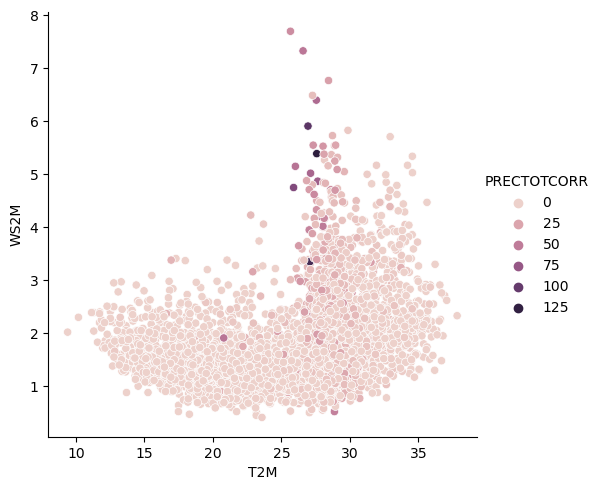

In [9]:
sns.relplot(x='T2M',y='WS2M',hue='PRECTOTCORR',data=data)

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


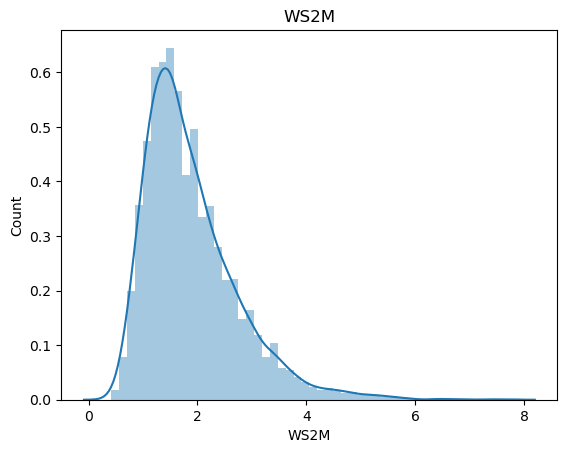

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


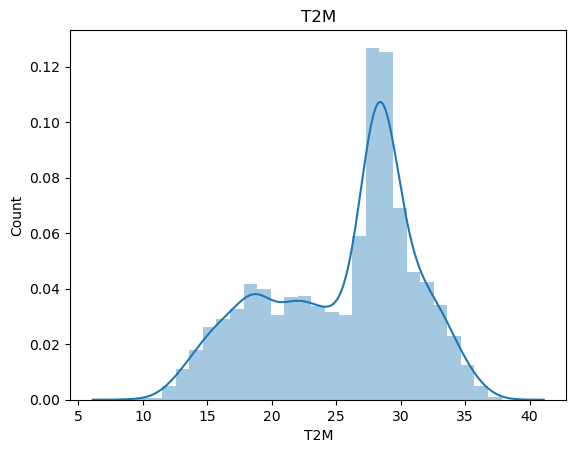

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


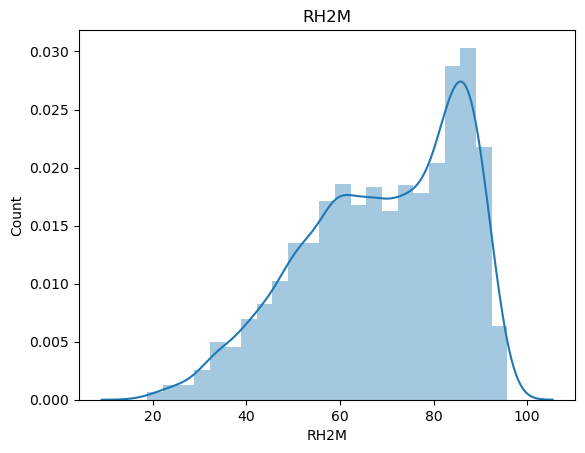

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


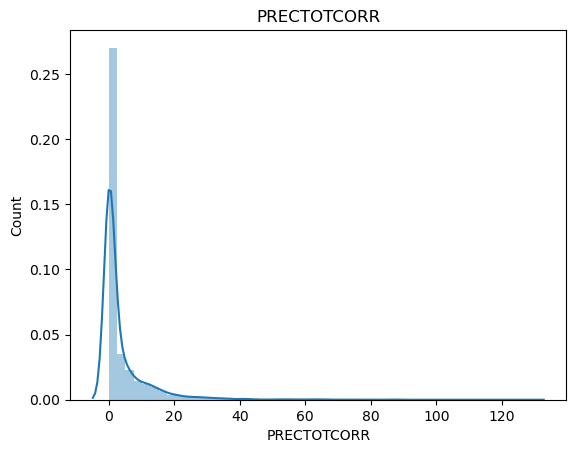

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


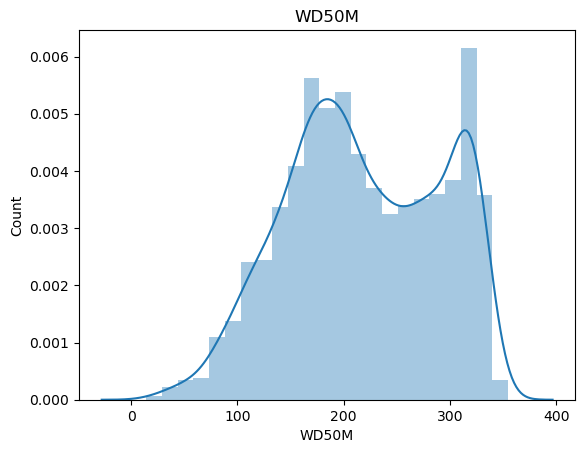

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


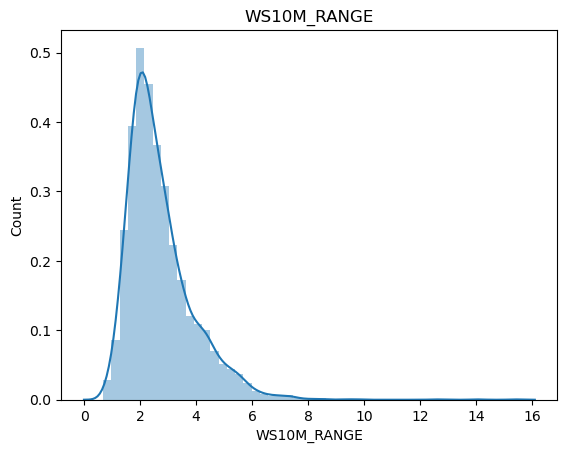

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


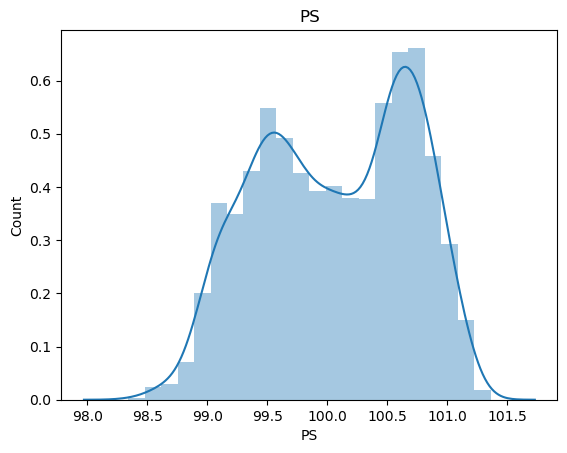

<Figure size 1500x1500 with 0 Axes>

In [10]:
for feature in continuous_feature:
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15, 15))
    plt.show()


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

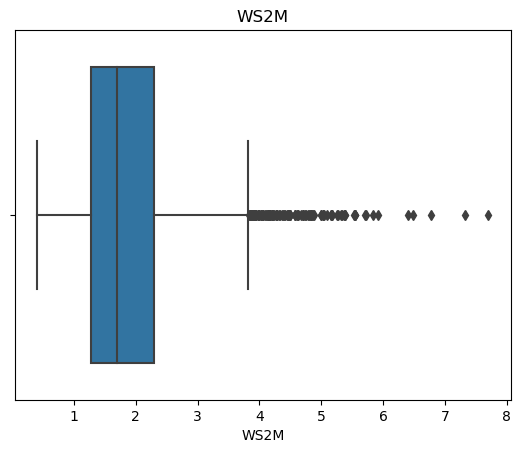

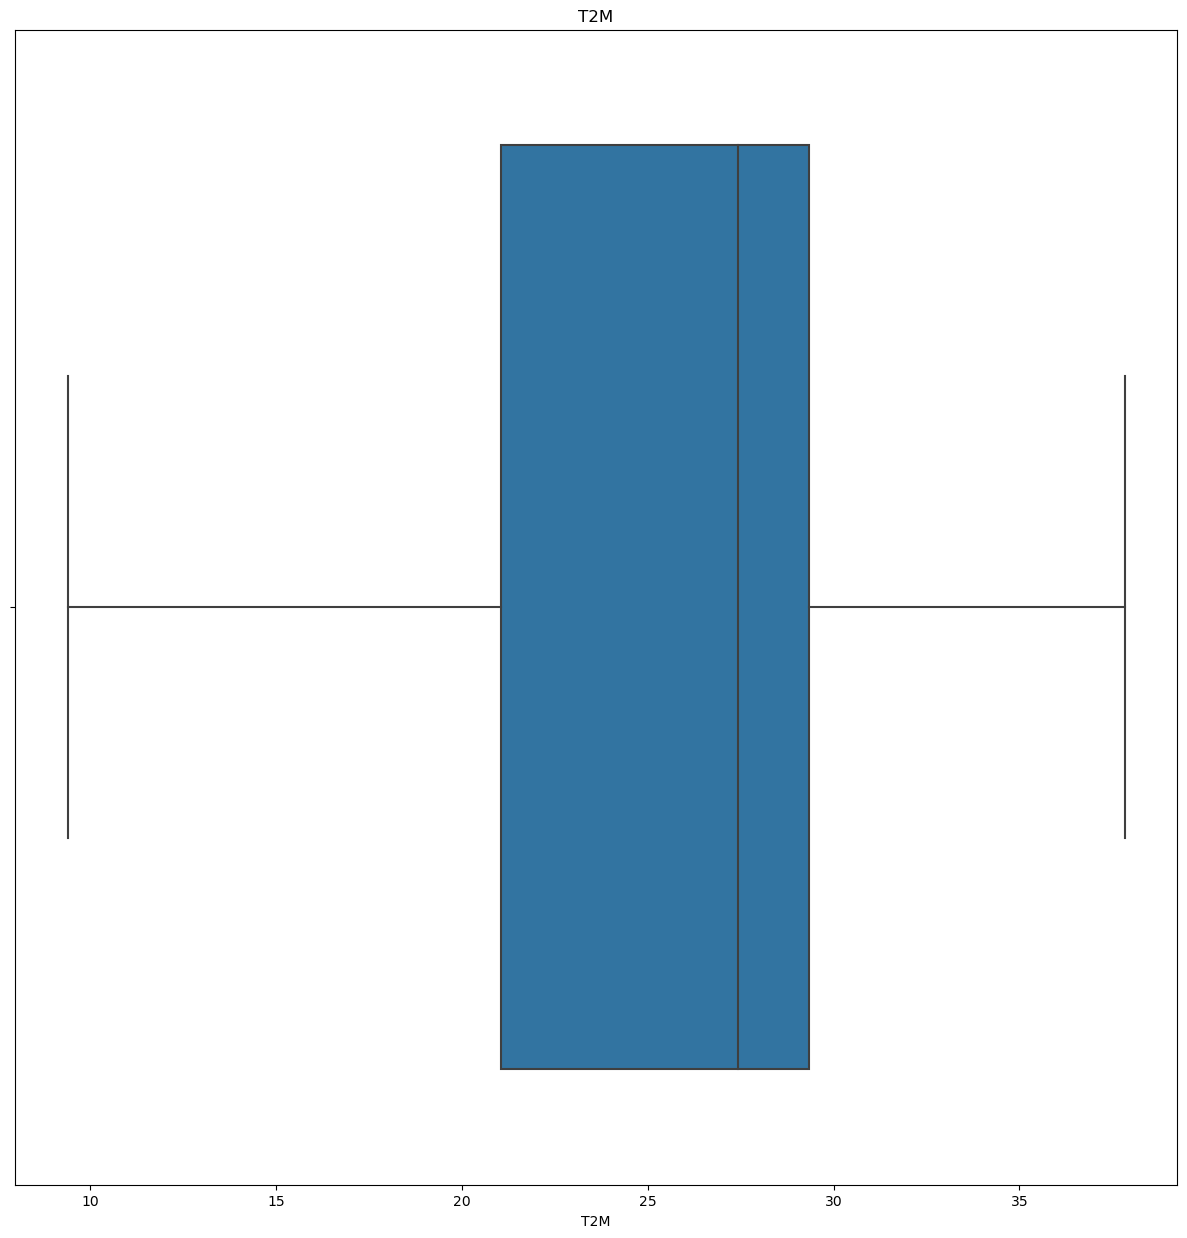

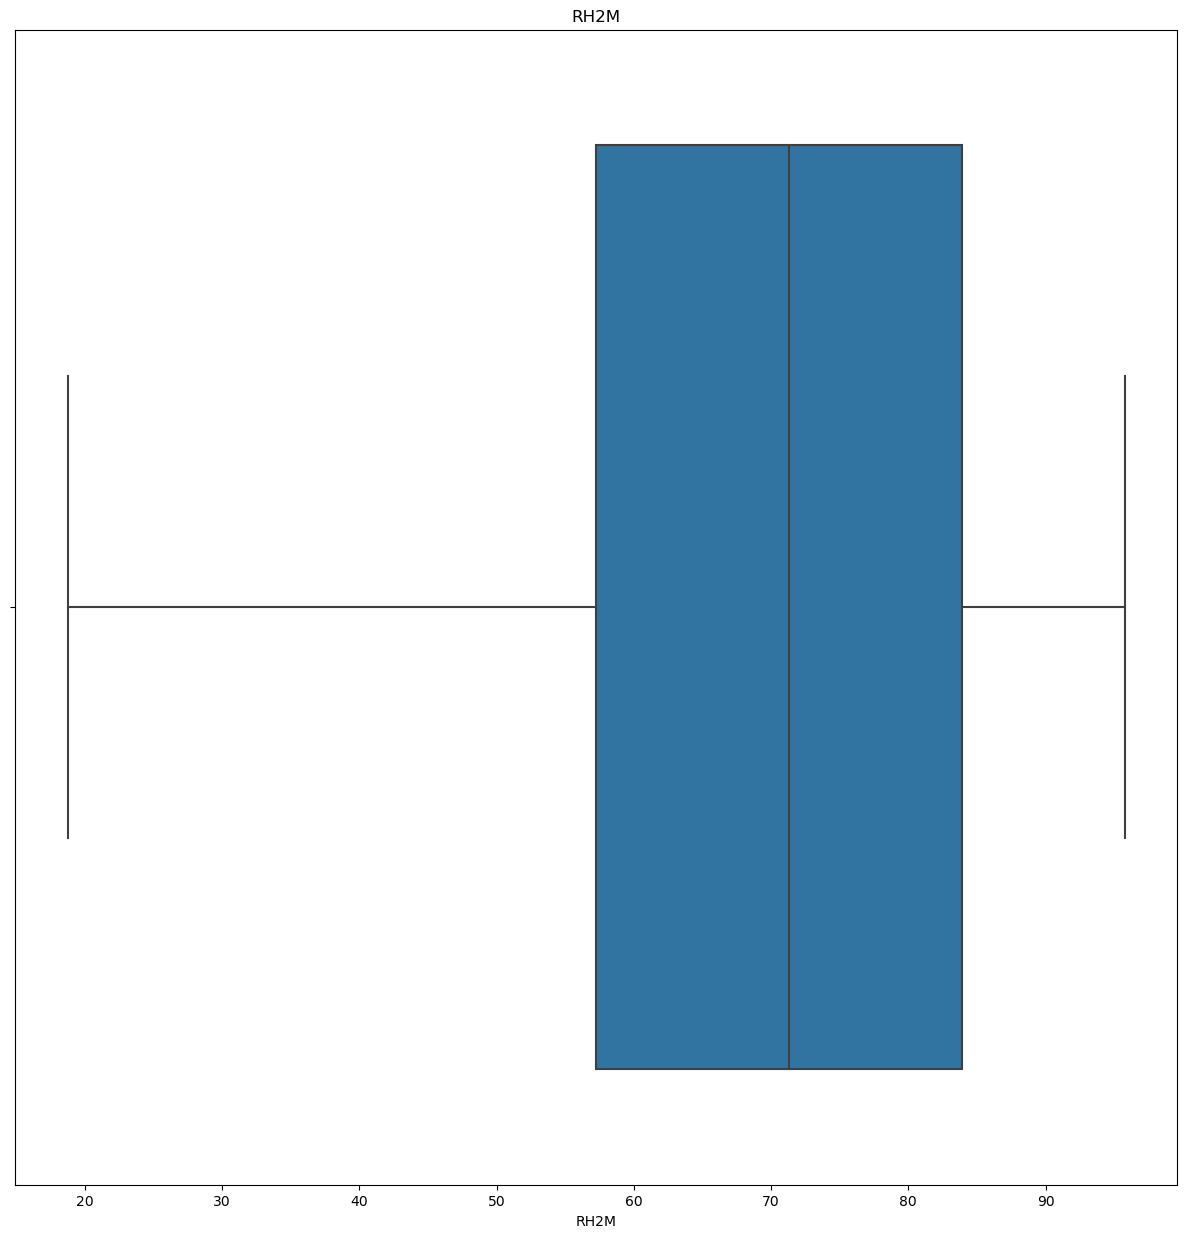

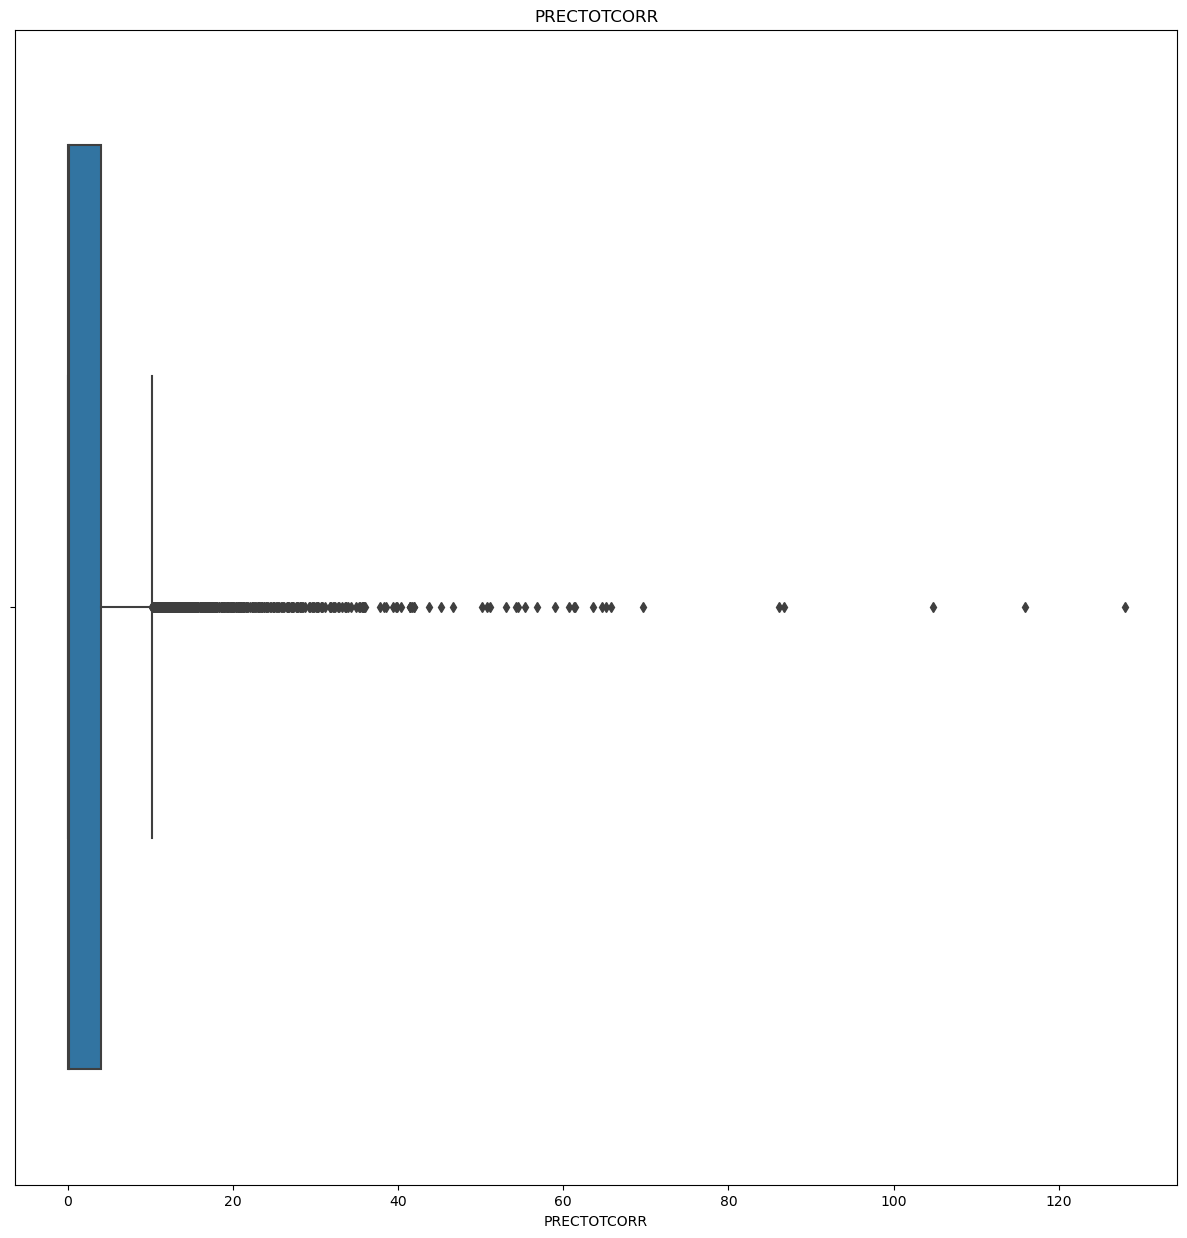

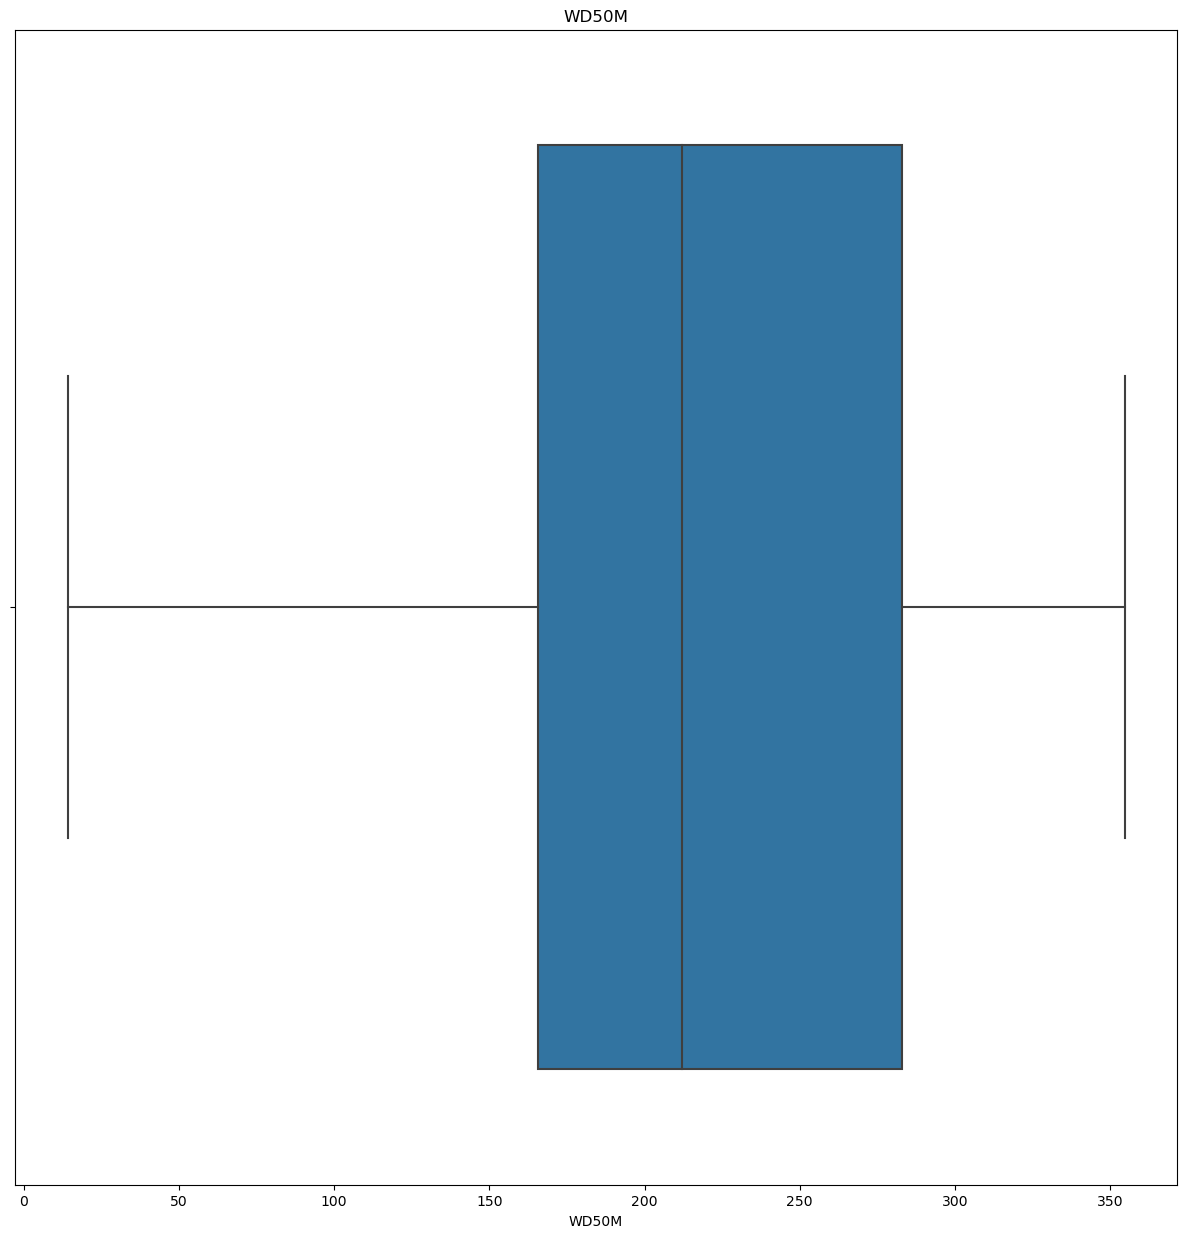

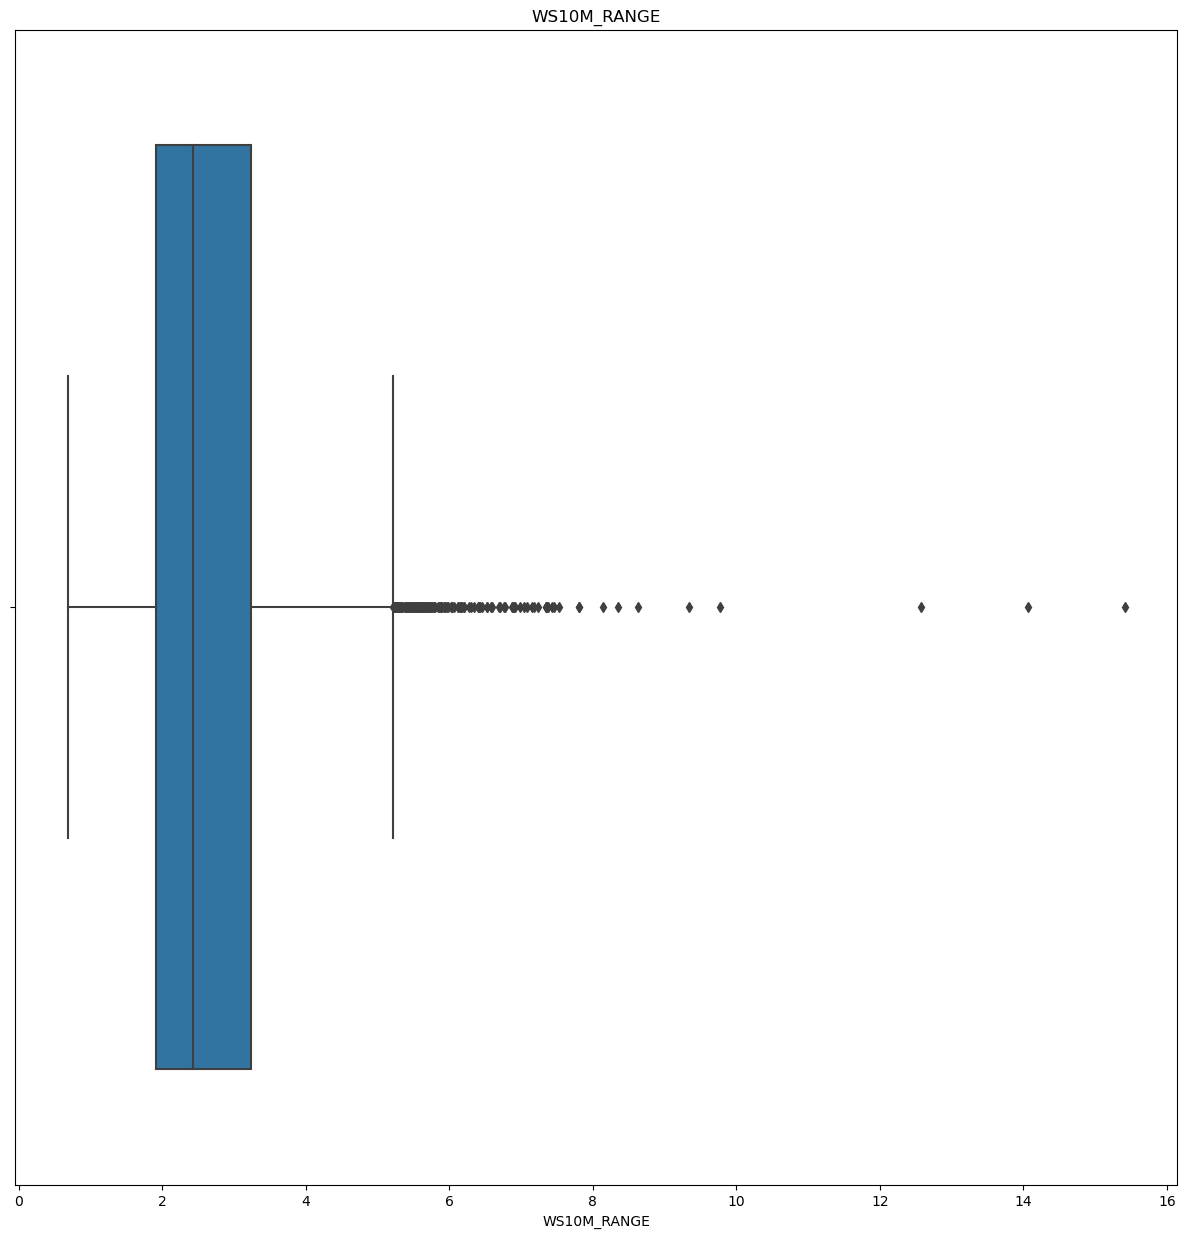

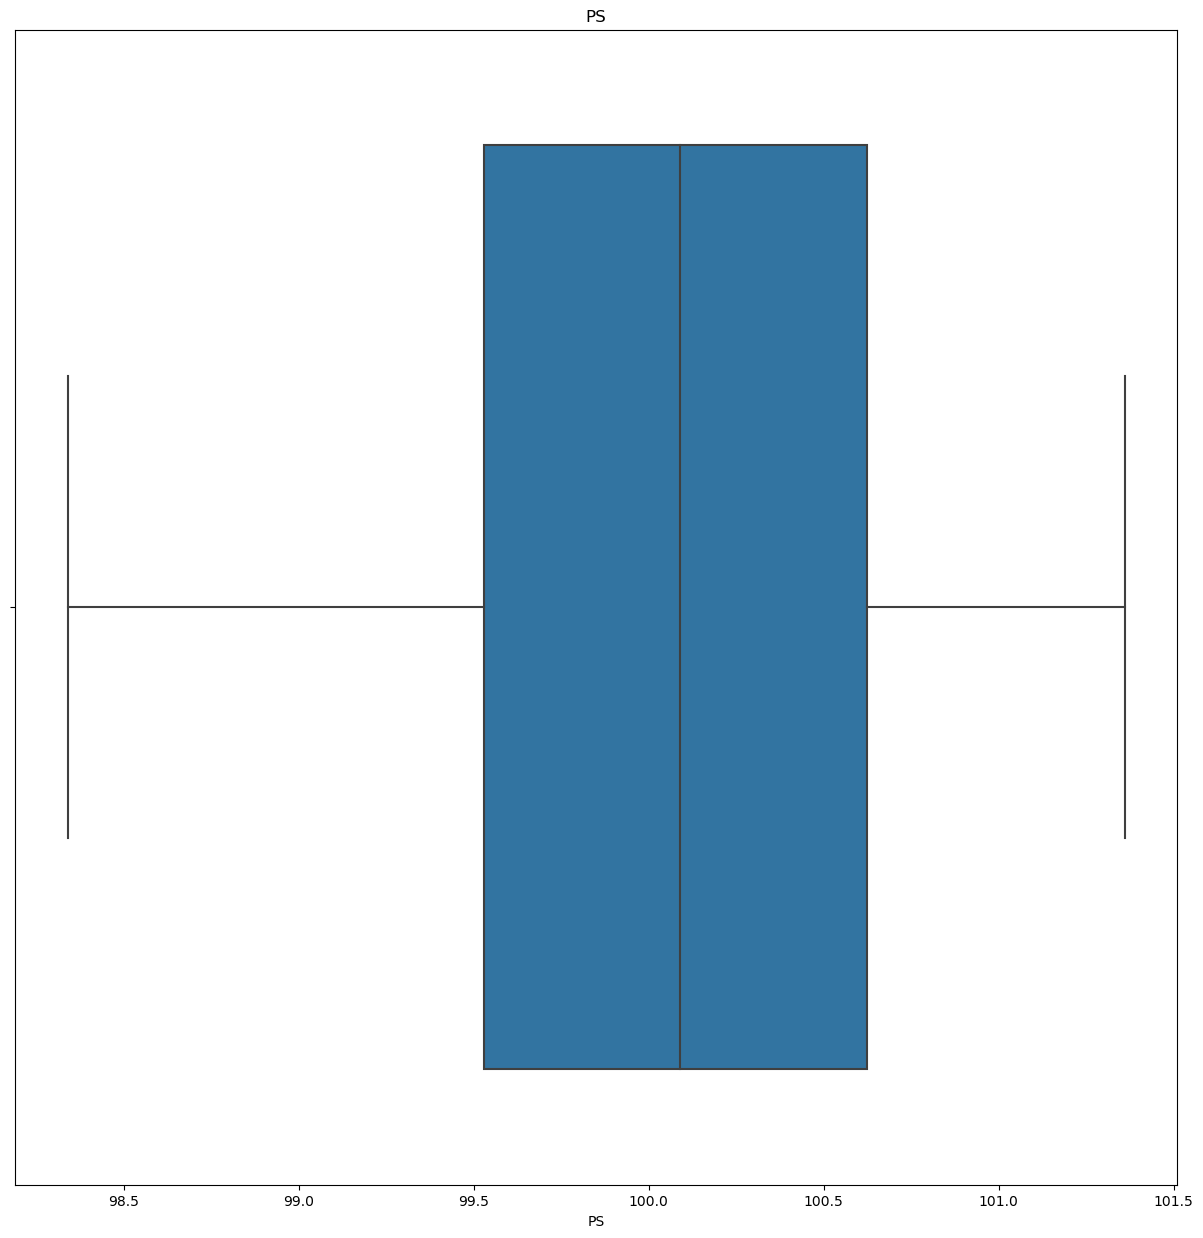

<Figure size 1500x1500 with 0 Axes>

In [11]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [12]:
d=df.copy()

In [13]:
print(d["T2M"].unique())
print(type(df["T2M"].unique()))
print(d["PRECTOTCORR"].unique())
print(type(df["PRECTOTCORR"].unique()))
# print(d["WS50M_RANGE"].unique())
print(type(d["WS2M"].unique()))


[17.58 15.07 13.91 ... 31.78 30.14 32.32]
<class 'numpy.ndarray'>
[1.000e-02 0.000e+00 5.700e-01 ... 1.191e+01 8.270e+00 4.900e+00]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


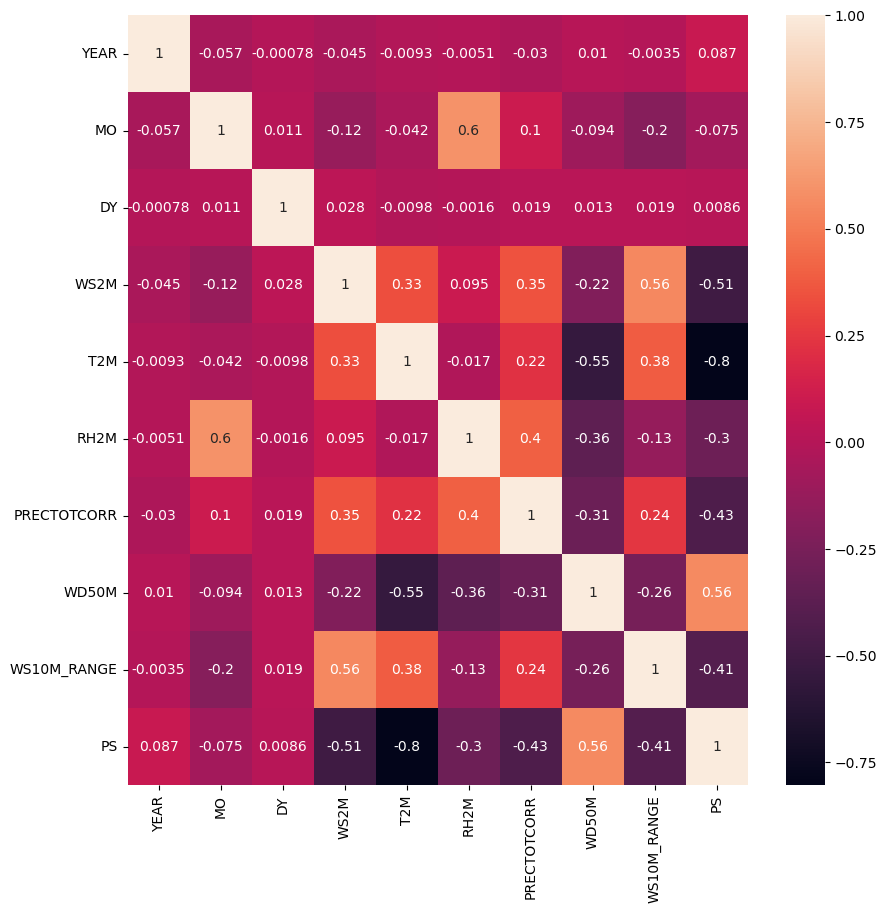

In [14]:
corrmat = d.corr()
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [15]:
def qq_plots(d, variable):
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()


WS2M


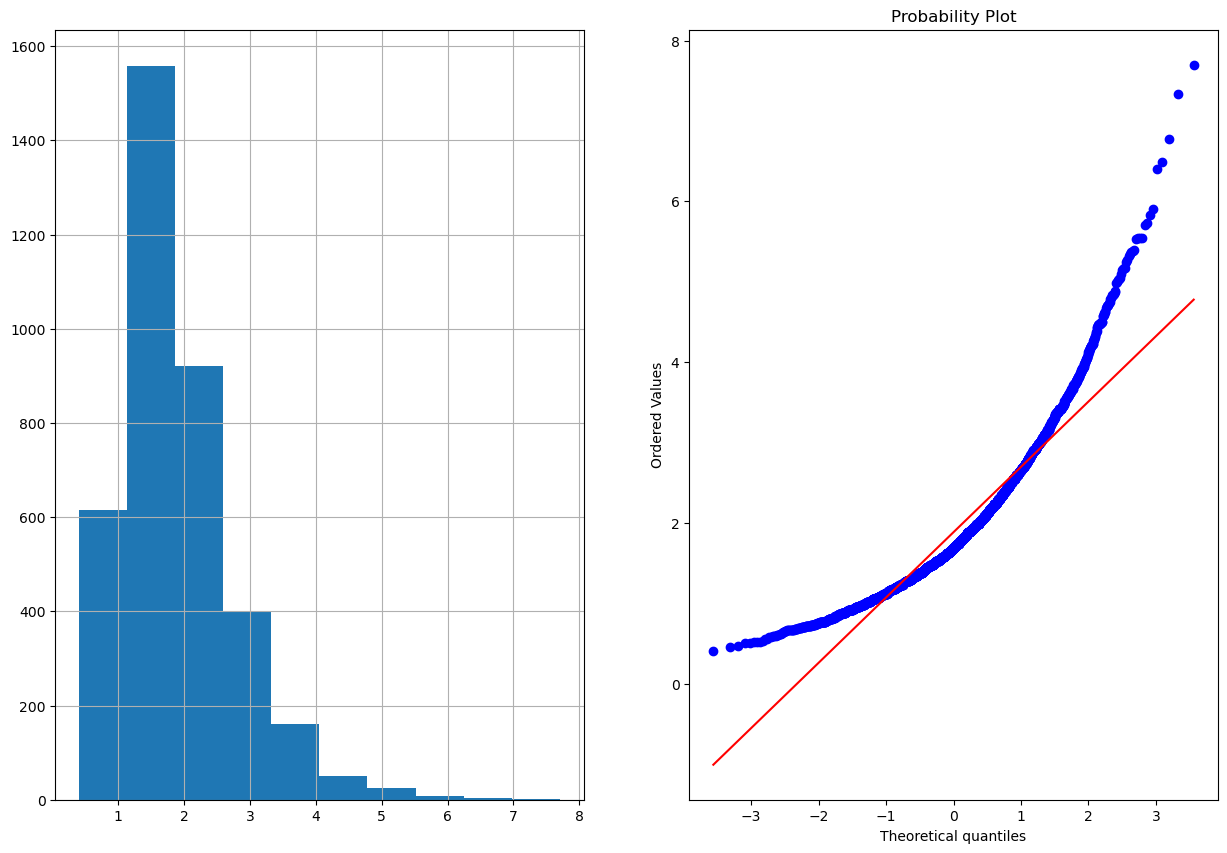

T2M


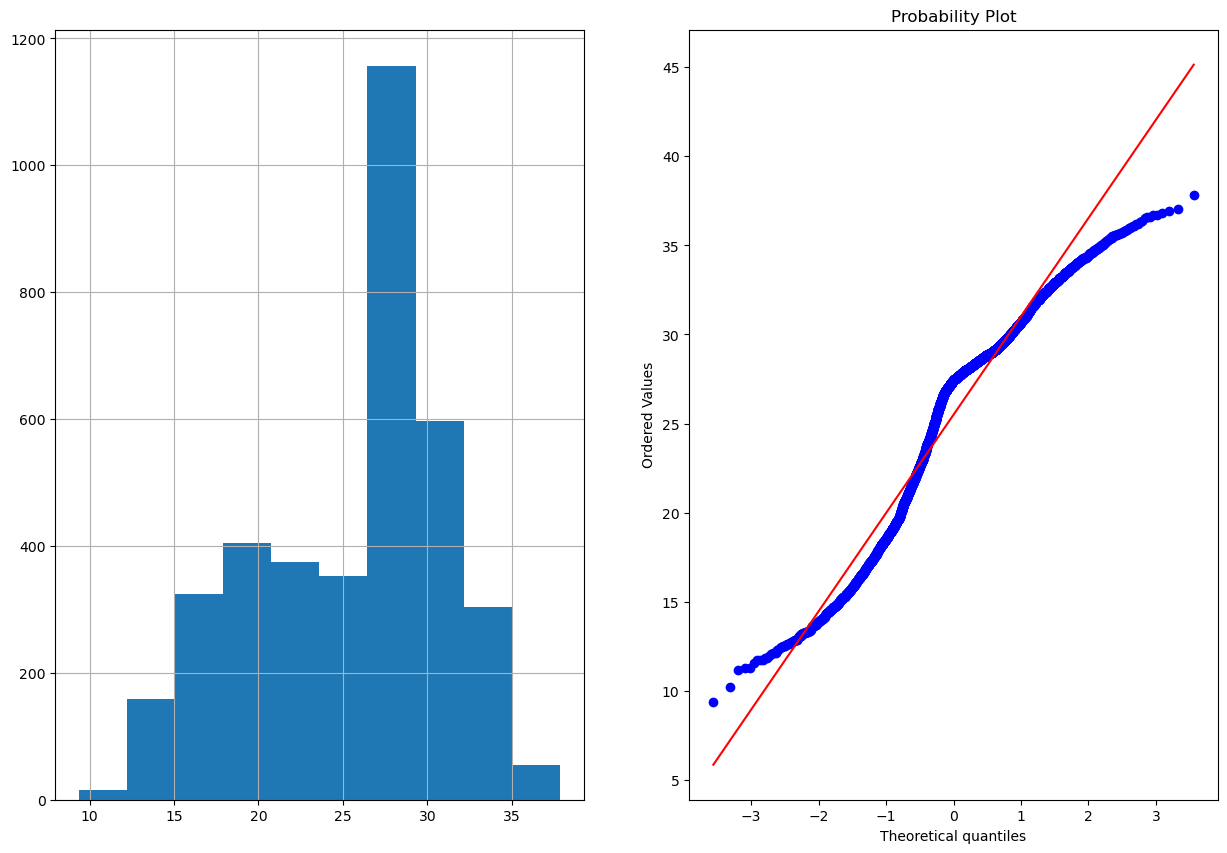

RH2M


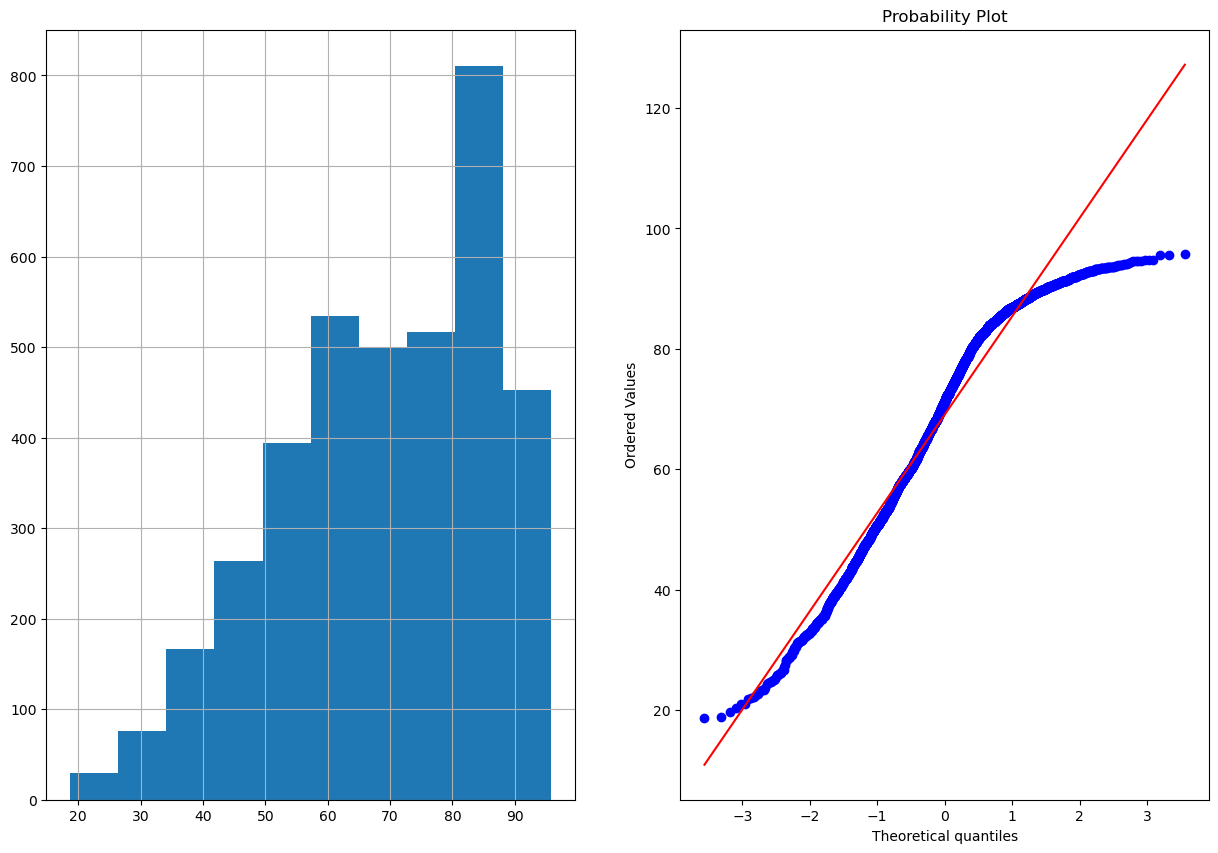

PRECTOTCORR


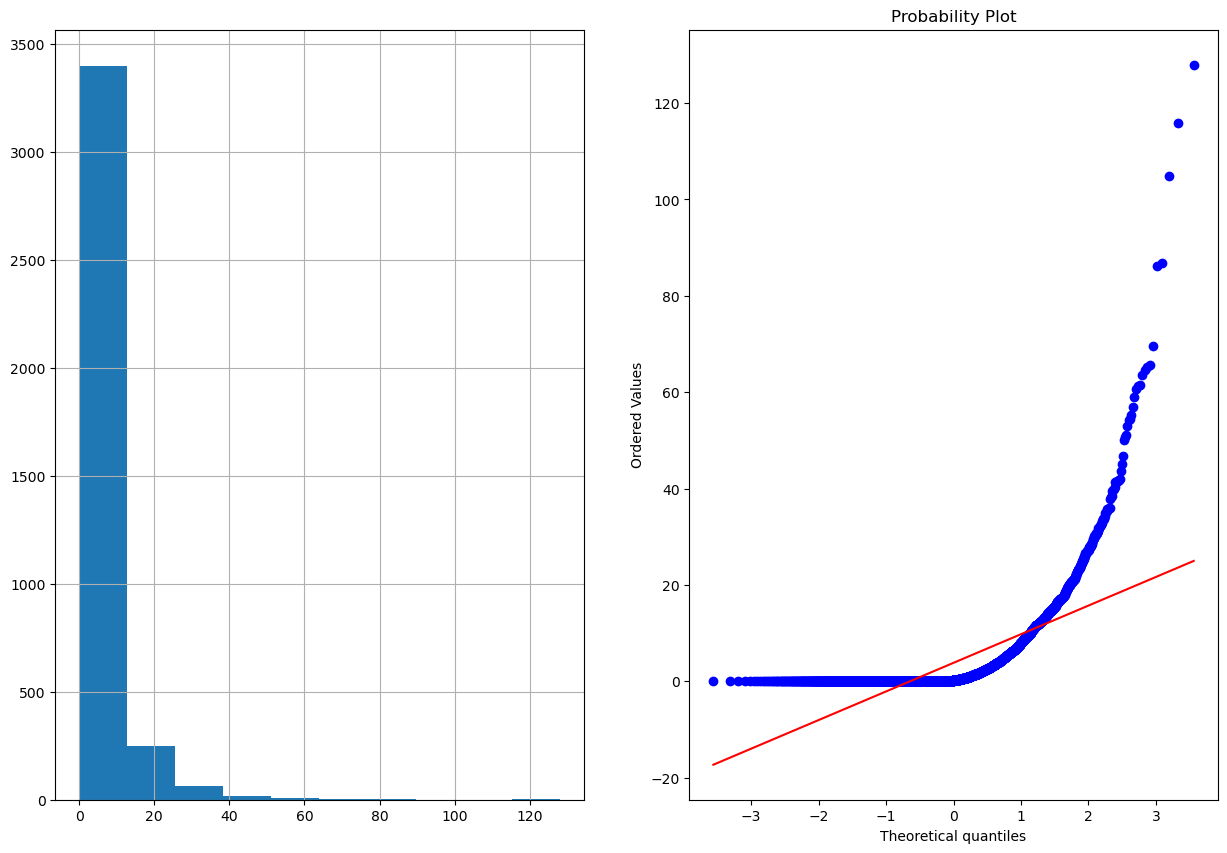

WD50M


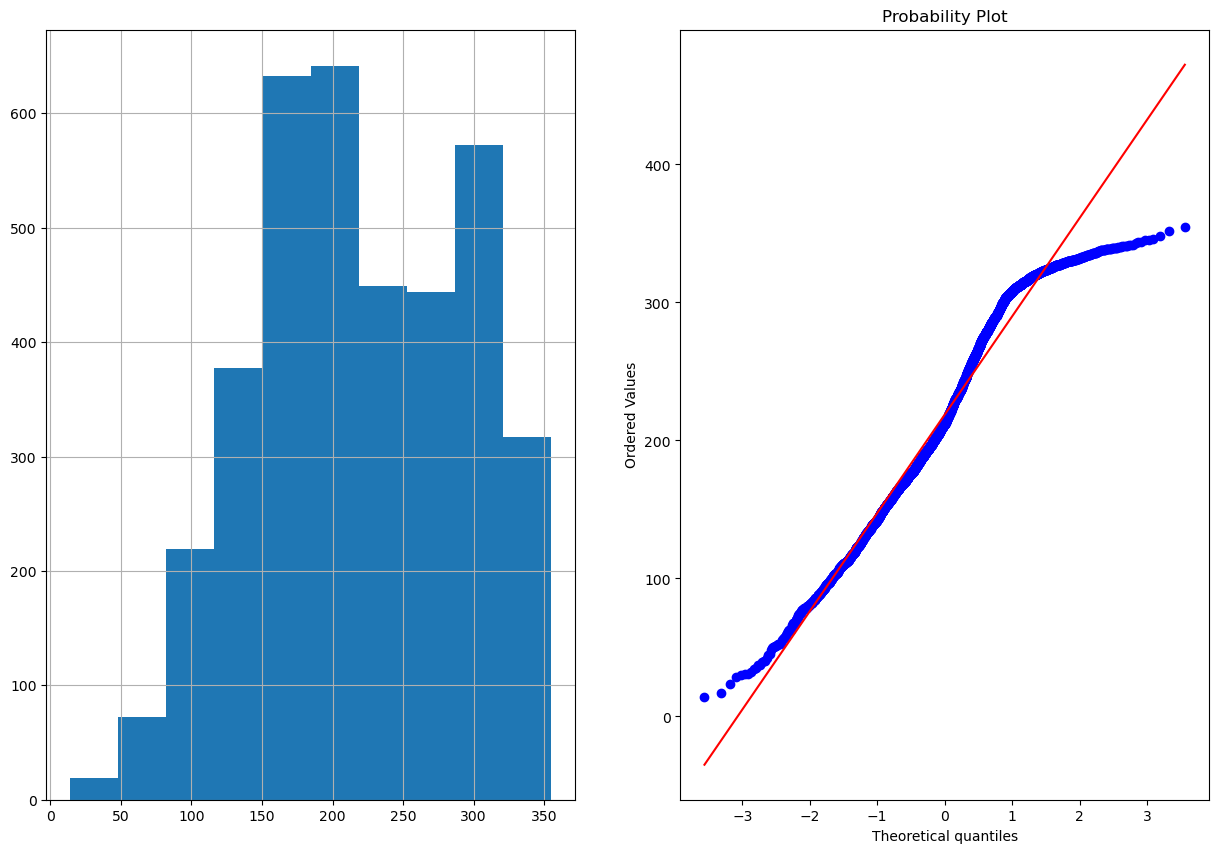

WS10M_RANGE


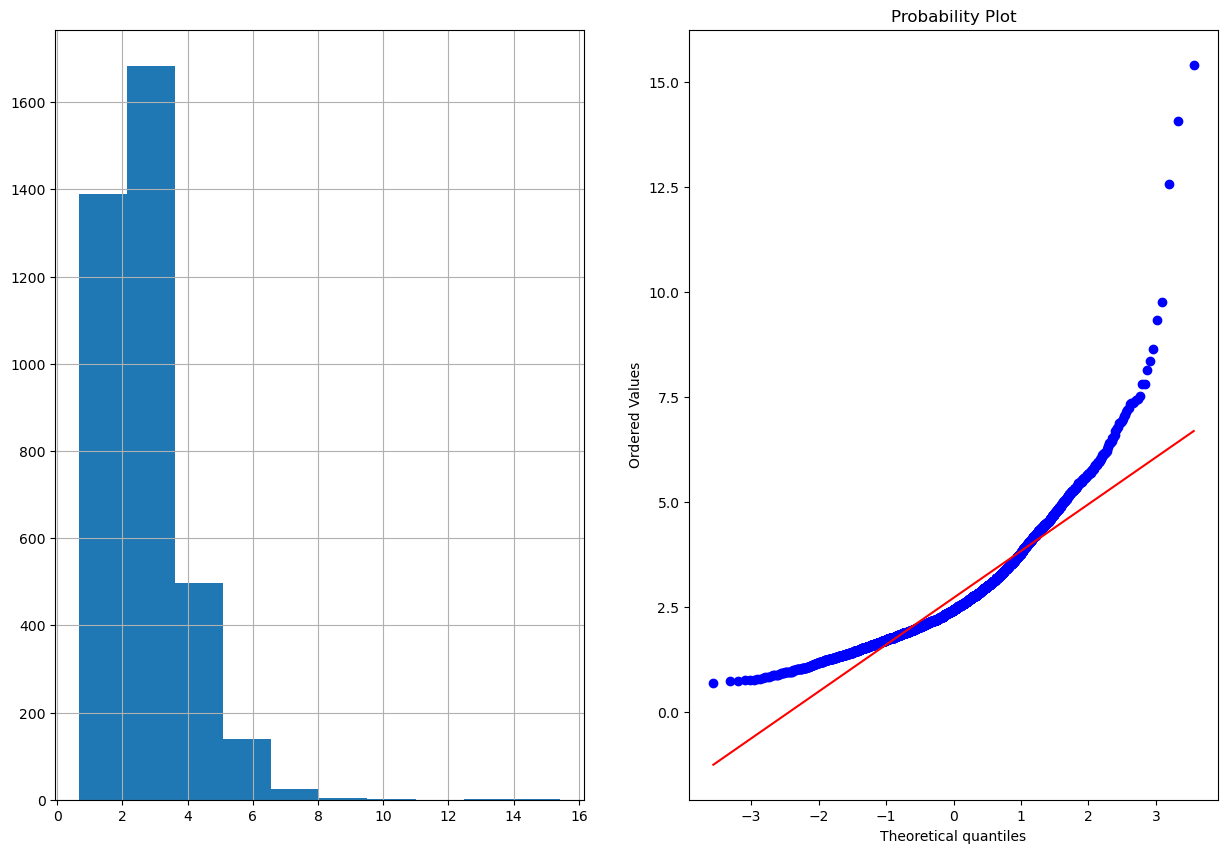

PS


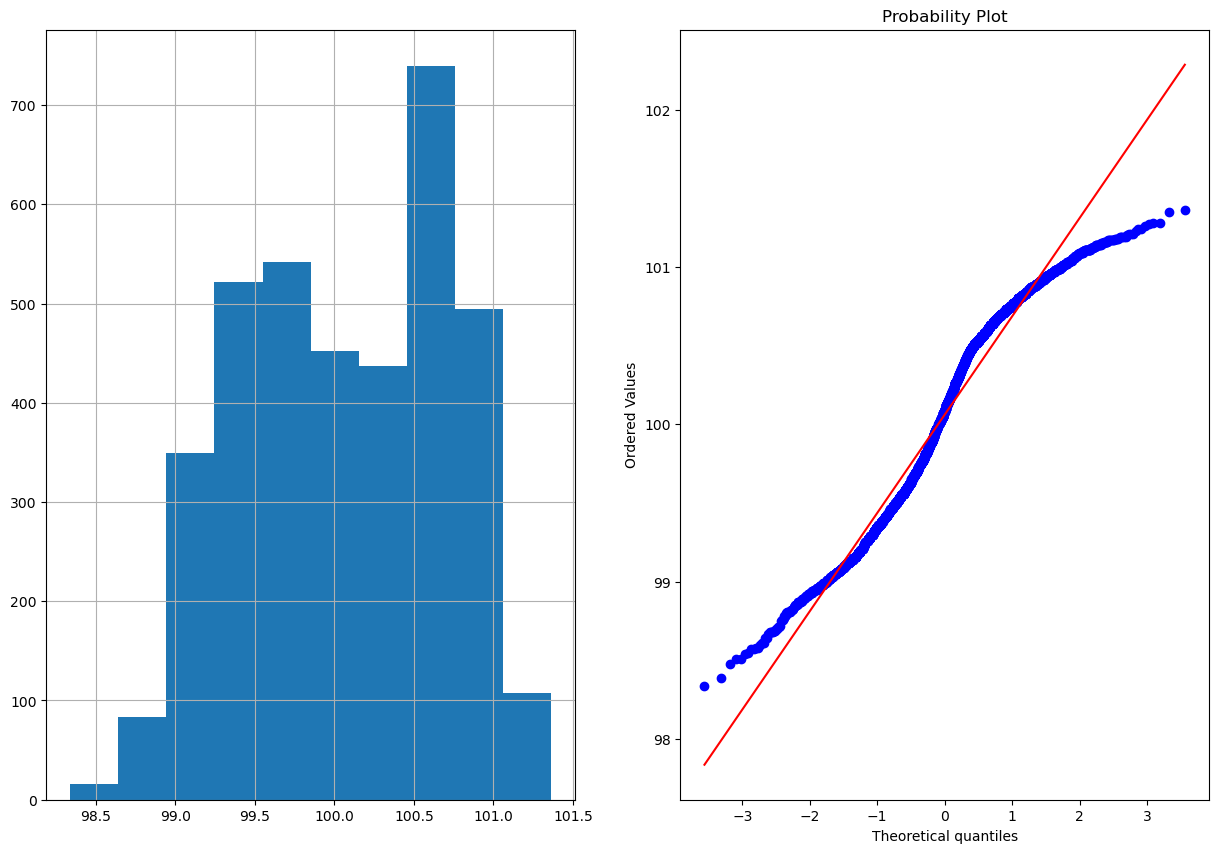

In [16]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()


In [17]:
d.PRECTOTCORR.unique()


array([1.000e-02, 0.000e+00, 5.700e-01, ..., 1.191e+01, 8.270e+00,
       4.900e+00])

In [18]:
d1=d.copy()

In [19]:

d1=d1.PRECTOTCORR.map({0:1})

In [20]:
d2=d1.replace(np.nan, 0)

In [21]:
d2.unique()


array([0., 1.])

In [22]:
d3=d['T2M']

In [23]:
d4 = pd.concat([d3, d2], axis=1, join='inner')
display(d4)


,T2M,PRECTOTCORR
0,17.58,0.0
1,15.07,1.0
2,13.91,1.0
3,13.65,1.0
4,13.66,1.0
...,...,...
3738,30.13,1.0
3739,30.05,1.0
3740,30.83,1.0
3741,32.32,1.0


In [24]:
d7=d['DY']

In [25]:
d8=d['MO']

In [26]:
d9=d['YEAR']

In [27]:
d10 = pd.concat([d4, d7], axis=1, join='inner')
display(d10)


,T2M,PRECTOTCORR,DY
0,17.58,0.0,1
1,15.07,1.0,2
2,13.91,1.0,3
3,13.65,1.0,4
4,13.66,1.0,5
...,...,...,...
3738,30.13,1.0,27
3739,30.05,1.0,28
3740,30.83,1.0,29
3741,32.32,1.0,30


In [28]:
d11 = pd.concat([d10, d8], axis=1, join='inner')
display(d11)


,T2M,PRECTOTCORR,DY,MO
0,17.58,0.0,1,1
1,15.07,1.0,2,1
2,13.91,1.0,3,1
3,13.65,1.0,4,1
4,13.66,1.0,5,1
...,...,...,...,...
3738,30.13,1.0,27,3
3739,30.05,1.0,28,3
3740,30.83,1.0,29,3
3741,32.32,1.0,30,3


In [29]:
d12 = pd.concat([d11, d9], axis=1, join='inner')
display(d12)


,T2M,PRECTOTCORR,DY,MO,YEAR
0,17.58,0.0,1,1,2011
1,15.07,1.0,2,1,2011
2,13.91,1.0,3,1,2011
3,13.65,1.0,4,1,2011
4,13.66,1.0,5,1,2011
...,...,...,...,...,...
3738,30.13,1.0,27,3,2021
3739,30.05,1.0,28,3,2021
3740,30.83,1.0,29,3,2021
3741,32.32,1.0,30,3,2021


In [30]:
d12

,T2M,PRECTOTCORR,DY,MO,YEAR
0,17.58,0.0,1,1,2011
1,15.07,1.0,2,1,2011
2,13.91,1.0,3,1,2011
3,13.65,1.0,4,1,2011
4,13.66,1.0,5,1,2011
...,...,...,...,...,...
3738,30.13,1.0,27,3,2021
3739,30.05,1.0,28,3,2021
3740,30.83,1.0,29,3,2021
3741,32.32,1.0,30,3,2021


In [31]:
d12['PRECTOTCORR'].unique()

array([0., 1.])

In [32]:
d13=d['RH2M'].copy()

In [33]:
d14=d['WD50M'].copy()

In [34]:
d15 = pd.concat([d12, d13], axis=1, join='inner')
display(d15)

,T2M,PRECTOTCORR,DY,MO,YEAR,RH2M
0,17.58,0.0,1,1,2011,74.25
1,15.07,1.0,2,1,2011,58.88
2,13.91,1.0,3,1,2011,57.38
3,13.65,1.0,4,1,2011,61.44
4,13.66,1.0,5,1,2011,55.25
...,...,...,...,...,...,...
3738,30.13,1.0,27,3,2021,24.94
3739,30.05,1.0,28,3,2021,32.00
3740,30.83,1.0,29,3,2021,42.88
3741,32.32,1.0,30,3,2021,32.25


In [35]:
d16 = pd.concat([d15, d14], axis=1, join='inner')
display(d16)

,T2M,PRECTOTCORR,DY,MO,YEAR,RH2M,WD50M
0,17.58,0.0,1,1,2011,74.25,296.38
1,15.07,1.0,2,1,2011,58.88,331.19
2,13.91,1.0,3,1,2011,57.38,338.12
3,13.65,1.0,4,1,2011,61.44,338.44
4,13.66,1.0,5,1,2011,55.25,331.12
...,...,...,...,...,...,...,...
3738,30.13,1.0,27,3,2021,24.94,243.88
3739,30.05,1.0,28,3,2021,32.00,205.38
3740,30.83,1.0,29,3,2021,42.88,244.38
3741,32.32,1.0,30,3,2021,32.25,257.50


In [36]:
d17=d['WS2M'].copy()

In [37]:
d18 = pd.concat([d16, d17], axis=1, join='inner')
display(d18)

,T2M,PRECTOTCORR,DY,MO,YEAR,RH2M,WD50M,WS2M
0,17.58,0.0,1,1,2011,74.25,296.38,2.53
1,15.07,1.0,2,1,2011,58.88,331.19,1.98
2,13.91,1.0,3,1,2011,57.38,338.12,1.95
3,13.65,1.0,4,1,2011,61.44,338.44,2.14
4,13.66,1.0,5,1,2011,55.25,331.12,2.05
...,...,...,...,...,...,...,...,...
3738,30.13,1.0,27,3,2021,24.94,243.88,1.02
3739,30.05,1.0,28,3,2021,32.00,205.38,0.81
3740,30.83,1.0,29,3,2021,42.88,244.38,1.66
3741,32.32,1.0,30,3,2021,32.25,257.50,2.27


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRECTOTCORR', ylabel='count'>

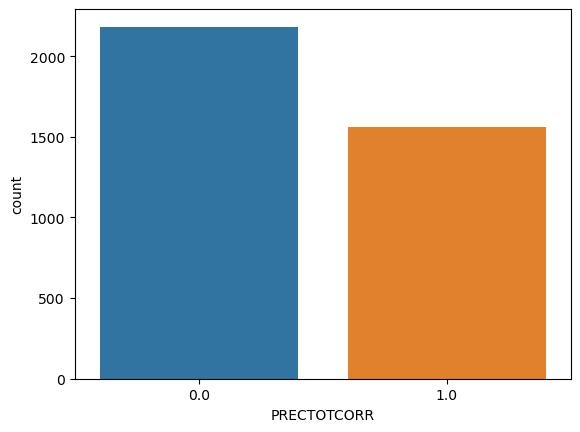

In [38]:
sns.countplot(d18["PRECTOTCORR"])

In [39]:
d18.to_csv("Durgapur-1.csv")

In [40]:
d18

,T2M,PRECTOTCORR,DY,MO,YEAR,RH2M,WD50M,WS2M
0,17.58,0.0,1,1,2011,74.25,296.38,2.53
1,15.07,1.0,2,1,2011,58.88,331.19,1.98
2,13.91,1.0,3,1,2011,57.38,338.12,1.95
3,13.65,1.0,4,1,2011,61.44,338.44,2.14
4,13.66,1.0,5,1,2011,55.25,331.12,2.05
...,...,...,...,...,...,...,...,...
3738,30.13,1.0,27,3,2021,24.94,243.88,1.02
3739,30.05,1.0,28,3,2021,32.00,205.38,0.81
3740,30.83,1.0,29,3,2021,42.88,244.38,1.66
3741,32.32,1.0,30,3,2021,32.25,257.50,2.27
